<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DACS/blob/main/DTDA/territory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Territorial design

## Which branch will deliver my pizza?

In this module we will revisit the concept of iterating over a set of steps. To keep things simple, let us assume that we live in a city that is perfectly square-shaped. Also, we have flying cars and we can just travel in a straight line from one point to another. All the buildings are the same exact size, also perfect squares, and right next to one another. Mathematicians and physicists like it when the world works like this. It makes it easy to get started with understanding how things work. Potentially complicated details can be introduced later on to see what, if anything, fundamentally alters our understanding of a situation.

So, we need a square piece of land. Let's use an image. Each pixel of the image can be a lot on which we can put a building. We just need to decide how many pixels wide (and long, since it's a square) our city will be; this is referred to as the *resolution* of the image. We can use a variable for this. 

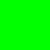

In [1]:
size = 50
from PIL import Image # a library for handling images
color = (0, 255, 0) # green (as an integer RGB color code)
town = Image.new('RGB', (size, size), color)
display(town)

That'a cute little town. Very green, too. Now, let's open a pizza place. In such a town, the address boils down to indicating the *row* (the north-south position, if you think of the image as a map) and the *column8 (the west-east position) of the pixel in which we will put the building that the pizza place operates at.

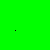

In [2]:
positions = town.load() # access the pixels by row and column numbers; top left will be (0, 0)
row = 15
column = 30
positions[row, column] = (0, 0, 0) # black building
display(town)

It is so very small and hard to see. Let's scale up the image five times, essentially making every pixel of our image a five-by-five square of 25 pixels total. 

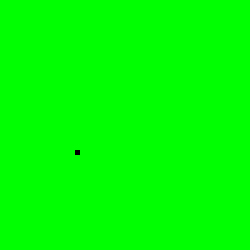

In [3]:
magnification = 5
bigger = size * magnification
visible = town.resize((bigger, bigger), Image.NEAREST) 
display(visible)

We can alter the magnification and play the cell again until we are happy with the ease at which the building can be seen.

Since we only have one pizza place, we assume that the same one deliver to the whole town. Let's add another one, to spice things up (and reduce the delivery times). We can make a *list* of the building locations so that we do not need to manually repeat the positioning.

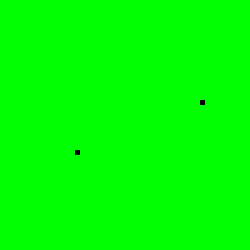

In [4]:
town = Image.new('RGB', (size, size), color) # reset the town
positions = town.load() # reload the access
restaurants = [ (15, 30), (40, 20) ] # store the coordinates of each restaurant
for (row, column) in restaurants: # iterate over the stored coordinates
  positions[row, column] = (0, 0, 0) # put the buildings
visible = town.resize((bigger, bigger), Image.NEAREST) # scale the image up
display(visible) # show it

Now we have to decide what's the boundary of the territory of each of the two restaurants. Let's start with a simple rule: each location will get their pizzas from whichever restaurant is *closer*. 

This means that we have to define *distance*. Since the premise was that we could have flying cars, we can go for the "bird flight" distance, called *Euclidean distance*.

Given two positions, we compute their Euclidean distance by first seeing how far apart the *rows* are. Then we look at the separation of the *columns*. Then, we take the *square* of each separation, sum them up, and take the square-root of the whole thing. This sounds like a perfect *subroutine*.

In [5]:
from math import sqrt # square root already exists as a subroutine in a library for math stuff

def distance(firstPosition, secondPosition):
  (firstRow, firstColumn) = firstPosition # access row and column
  (secondRow, secondColumn) = secondPosition
  rowSeparation = firstRow - secondRow # subtract to compute how far apart they are
  columnSeparation = firstColumn - secondColumn
  combined = rowSeparation**2 + columnSeparation**2 # sum of squares
  return sqrt(combined) # the result is the square root

pos1 = (10, 20)
pos2 = (15, 15)
distance(pos1, pos2)

7.0710678118654755

This is not by any means the *only* way to measure distance, but it is good enough for our purposes of understanding territories.

Let's *iterate* over lots in town and see which of our restaurants is *closer*, meaning "which of the options minimizes the distance". This is referred to as *optimization* since we wish to assign for each address the *optimal* restaurant in terms of minimum delivery distance.

In [6]:
lots = [ (0, 0), (10, 50), (20, 25), (30, 5), (45, 15) ]
for lot in lots:
  distances = [ distance(lot, restaurant) for restaurant in restaurants ]
  smallest = min(distances)
  closest = distances.index(smallest)
  print(lot, closest, smallest)

(0, 0) 0 33.54101966249684
(10, 50) 0 20.615528128088304
(20, 25) 0 7.0710678118654755
(30, 5) 1 18.027756377319946
(45, 15) 1 7.0710678118654755


So, for those five locations in particular, the first restaurant (at position zero of the list of restaurants) is closer for the first three locations, whereas the second one is closer for the last two. 

To visualize this, let's assign each restaurant it's own color. The first one can be the "blue branch" and the second one the "purple branch". Then, we can color every lot in the whole town by the color of the branch that is closest to them.

In [7]:
colors = [ (0, 0, 255), (255, 0, 255) ] # blue and purple
print(colors[0])
print(colors[1])

(0, 0, 255)
(255, 0, 255)


In [8]:
for row in range(size): # every row in town
  for column in range(size): # every column in town
    lot = (row, column)
    if lot not in restaurants: # if it is not a restaurant location
      distances = [ distance(lot, restaurant) for restaurant in restaurants ]
      smallest = min(distances)
      closest = distances.index(smallest)
      positions[row, column] = colors[closest]

Let's see what this looks like.

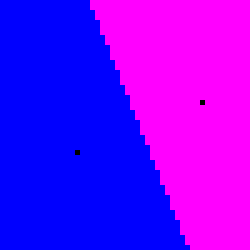

In [9]:
visible = town.resize((bigger, bigger), Image.NEAREST) # scale the image up
display(visible) # show it

What if we have more restaurants? The *logic* remains **exactly the same**. We just need more colors (as many as we have restaurants). We could use a library that has a subroutine that generates a *palette* for that. And we could choose the restaurant positions pseudorandomly to try out different configurations. 

In [10]:
howMany = 7
import seaborn as sns
palette = sns.color_palette('bright', howMany) # see https://seaborn.pydata.org/generated/seaborn.color_palette.html
colors = palette.as_hex()
colors

['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1']

In [11]:
from random import randint # pseudorandom integers
restaurants = [] # empty list
while len(restaurants) < howMany: # until the length reaches the desired value
  row = randint(0, size - 1) # pick a row pseudorandomly
  column =  randint(0, size - 1) # pick a column pseudorandomly
  pos = (row, column)
  if pos not in restaurants: # if there is no restaurant there yet
    restaurants.append(pos) # add it to the end of the list
restaurants

[(40, 31), (11, 48), (4, 32), (20, 4), (1, 38), (21, 0), (10, 11)]

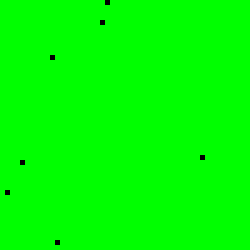

In [12]:
town = Image.new('RGB', (size, size), color) # reset the town
positions = town.load() # reload the access
for (row, column) in restaurants: # iterate over the stored coordinates
  positions[row, column] = (0, 0, 0) # put the restaurant buildings
visible = town.resize((bigger, bigger), Image.NEAREST) # scale the image up
display(visible) # show just the restaurants

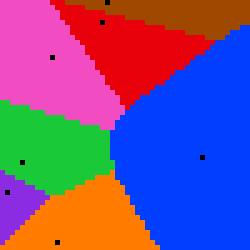

In [13]:
from PIL import ImageColor
for row in range(size): # every row in town
  for column in range(size): # every column in town
    lot = (row, column)
    if lot not in restaurants: # if it is not a restaurant location
      distances = [ distance(lot, restaurant) for restaurant in restaurants ]
      smallest = min(distances)
      closest = distances.index(smallest)
      positions[row, column] = ImageColor.getcolor(colors[closest], 'RGB')
visible = town.resize((bigger, bigger), Image.NEAREST) # scale the image up
display(visible) # show the territories

Let's put the whole thing into one single block of code so we can easily alter the size of the town, the number of restaurants, and the magnification of the map when we draw it.

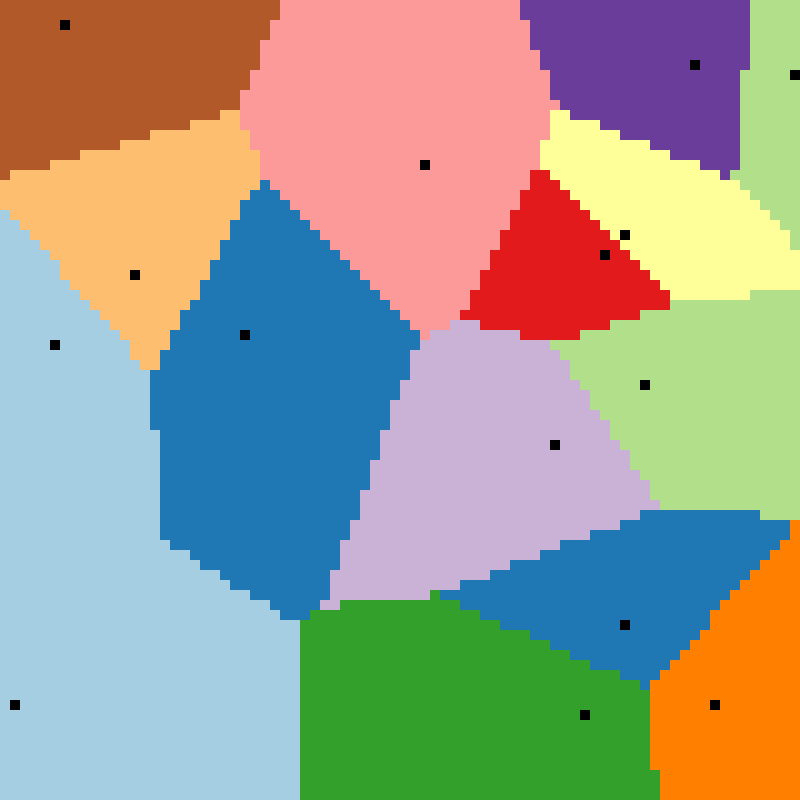

In [15]:
size = 80
magnification = 10
howMany = 15

town = Image.new('RGB', (size, size), (255, 255, 255)) # make an all-white image
positions = town.load() # access the pixels by row and column numbers; top left will be (0, 0)

restaurants = [] # empty list
while len(restaurants) < howMany: # until the length reaches the desired value
  pos = (randint(0, size - 1), randint(0, size - 1))
  if pos not in restaurants: # if there is no restaurant there yet
    restaurants.append(pos) # add it to the end of the list
    (row, column) = pos
    positions[row, column] = (0, 0, 0) # put the restaurant building in black

colors = sns.color_palette('Paired', howMany).as_hex()
for row in range(size): # every row in town
  for column in range(size): # every column in town
    lot = (row, column)
    if lot not in restaurants: # if it is not a restaurant location
      distances = [ distance(lot, restaurant) for restaurant in restaurants ]
      closest = distances.index(min(distances))
      positions[row, column] = ImageColor.getcolor(colors[closest], 'RGB')

bigger = size * magnification
visible = town.resize((bigger, bigger), Image.NEAREST) # scale
display(visible) # show 